In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [2]:
path = 'C:/Users/user/Desktop/16017005/Airline' #파일 경로 지정

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'Airline.csv',
 'Airline_Experiment(EDA).ipynb',
 'Airline_Experiment.ipynb',
 'Airline_Experiment_DataModeling(Categorical).ipynb',
 'Airline_Experiment_DataModeling(Numerical, Pycaret).ipynb',
 'Airline_Experiment_DataModeling(Numerical, Sklearn, Optuna).ipynb',
 'Airline_Modeling(Revised).ipynb',
 'Airline_revised.csv',
 'Airline_revised_Numerical.csv',
 'catboost_info',
 'Description.xlsx',
 'logs.log',
 'optuna_contour.jpg',
 'optuna_coordinate.jpg',
 'optuna_optimization_history_plot.jpg',
 'optuna_parameter_importance.jpg',
 'problem.txt',
 'Untitled.ipynb']

In [4]:
data = pd.read_csv(path+'/Airline_revised.csv' ,engine='python',encoding='CP949')

In [5]:
data.drop(["Unnamed: 0", "id"], axis=1, inplace=True) #필요없는 칼럼 삭제
data
pd.set_option('display.max_columns', None)

In [6]:
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.0,1,1,0,1,0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,1,0,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0
103590,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1
103591,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0
103592,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0


In [7]:
data.value_counts('Baggage handling')

Baggage handling
4    37274
5    27047
3    20567
2    11483
1     7223
dtype: int64

In [8]:
# 5점제 리커트 척도

# 0점이 1% 미만 = 최빈값 대체
# 0점이 1% 이상 = 라벨 인코딩 후, 응닶 없음이라는 파생변수

In [9]:
data.loc[data['Leg room service'] == 0, 'Leg room service'] = 4
data.loc[data['Food and drink'] == 0, 'Food and drink'] = 4
data.loc[data['Inflight entertainment']== 0, 'Inflight entertainment'] =4
data.loc[data['Cleanliness']== 0, 'Cleanliness'] =4
data.loc[data['On-board service']== 0, 'On-board service'] =4
data.loc[data['Inflight service']== 0,  'Inflight service'] =4
data.loc[data['Gate location']== 0, 'Gate location'] =3
data.loc[data['Seat comfort']== 0, 'Seat comfort'] =4
data.loc[data['Checkin service']== 0, 'Checkin service'] =4

In [10]:
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.0,1,1,0,1,0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,1,0,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0
103590,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1
103591,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0
103592,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0


In [11]:
data.loc[data['Departure/Arrival time convenient'] > 0, 'Departure/Arrival time convenient N/A'] = 1
data.loc[data['Departure/Arrival time convenient'] == 0, 'Departure/Arrival time convenient N/A'] = 0

data.loc[data['Ease of Online booking'] > 0, 'Ease of Online booking N/A'] = 1
data.loc[data['Ease of Online booking'] == 0, 'Ease of Online booking N/A'] = 0

data.loc[data['Inflight wifi service'] > 0, 'Inflight wifi service N/A'] = 1
data.loc[data['Inflight wifi service'] == 0, 'Inflight wifi service N/A'] = 0

data.loc[data['Online boarding'] > 0, 'Online boarding N/A'] = 1
data.loc[data['Online boarding'] == 0, 'Online boarding N/A'] = 0

In [12]:
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied,Departure/Arrival time convenient N/A,Ease of Online booking N/A,Inflight wifi service N/A,Online boarding N/A
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.0,1,1,0,1,0,0,1.0,1.0,1.0,1.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,1,0,0,0,1,0,1.0,1.0,1.0,1.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1,1.0,1.0,1.0,1.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0,1.0,1.0,1.0,1.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0,1.0,1.0,1.0,1.0
103590,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1,1.0,1.0,1.0,1.0
103591,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0,1.0,1.0,1.0,1.0
103592,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0,1.0,1.0,1.0,1.0


In [13]:
# flight distance
# standard scaler로 정규화

from sklearn.preprocessing import StandardScaler

# 평균:0 표준편차 :1
scaler = StandardScaler()
data.loc[:,['Flight Distance']] = scaler.fit_transform(data.loc[:,['Flight Distance']])

In [14]:
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied,Departure/Arrival time convenient N/A,Ease of Online booking N/A,Inflight wifi service N/A,Online boarding N/A
0,13,-0.731305,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.0,1,1,0,1,0,0,1.0,1.0,1.0,1.0
1,25,-0.956916,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,1,0,0,0,1,0,1.0,1.0,1.0,1.0
2,26,-0.047454,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1,1.0,1.0,1.0,1.0
3,25,-0.629028,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0,1.0,1.0,1.0,1.0
4,61,-0.977973,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,23,-1.000033,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0,1.0,1.0,1.0,1.0
103590,49,1.160818,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1,1.0,1.0,1.0,1.0
103591,30,0.807862,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0,1.0,1.0,1.0,1.0
103592,22,-0.189839,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0,1.0,1.0,1.0,1.0


In [15]:
!pip install pycaret

In [16]:
from pycaret.classification import *

In [17]:
clf = setup(data = data, target = 'satisfaction_satisfied', train_size=0.8, session_id = 123,  numeric_features= ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'])

,Description,Value
0,session_id,123
1,Target,satisfaction_satisfied
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(103594, 27)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best = compare_models(exclude = ['ridge', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9631,0.9950,0.9427,0.9714,0.9568,0.9246,0.9249,29.2380
lightgbm,Light Gradient Boosting Machine,0.9630,0.9945,0.9402,0.9736,0.9566,0.9244,0.9248,0.9650
xgboost,Extreme Gradient Boosting,0.9622,0.9947,0.9427,0.9695,0.9559,0.9229,0.9231,6.5110
rf,Random Forest Classifier,0.9620,0.9937,0.9397,0.9718,0.9554,0.9223,0.9227,5.6150
et,Extra Trees Classifier,0.9597,0.9933,0.9371,0.9690,0.9528,0.9176,0.9180,5.7060
dt,Decision Tree Classifier,0.9428,0.9422,0.9378,0.9309,0.9343,0.8836,0.8837,0.3320
gbc,Gradient Boosting Classifier,0.9402,0.9872,0.9162,0.9443,0.9300,0.8778,0.8781,9.3440
ada,Ada Boost Classifier,0.9282,0.9773,0.9099,0.9235,0.9166,0.8536,0.8536,2.3660
knn,K Neighbors Classifier,0.9146,0.9613,0.8747,0.9243,0.8988,0.8250,0.8260,6.0790
lr,Logistic Regression,0.9041,0.9651,0.8876,0.8910,0.8892,0.8047,0.8047,6.4520


In [19]:
from scipy.stats import pearsonr
def pearsonr_co(x,y):
        return pearsonr(x,y)[0]
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [20]:
co = data.corr(method=pearsonr_co) #피어슨 상관계수
co

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied,Departure/Arrival time convenient N/A,Ease of Online booking N/A,Inflight wifi service N/A,Online boarding N/A
Age,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001535,0.021465,0.208681,0.160316,0.076104,...,0.008921,-0.048593,-0.132656,-0.013339,-0.281821,0.137040,0.103356,0.024366,0.017897,0.103107
Flight Distance,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004751,0.057398,0.215191,0.157493,0.128713,...,0.006079,-0.267642,-0.404763,-0.123778,-0.225363,0.298915,0.095840,0.045735,-0.008363,0.092107
Inflight wifi service,0.017470,0.007050,1.000000,0.343758,0.715848,0.336106,0.130905,0.457002,0.122649,0.209115,...,0.008964,-0.104879,-0.037065,0.007988,-0.007706,0.284163,0.108465,0.324901,0.360822,0.197040
Departure/Arrival time convenient,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444567,0.004205,0.069990,0.011453,-0.004644,...,0.008846,0.259829,0.082372,0.028540,-0.207007,-0.051718,0.465416,0.105143,0.114074,0.050842
Ease of Online booking,0.024461,0.065697,0.715848,0.437021,1.000000,0.458794,0.026960,0.404093,0.030069,0.047420,...,0.007166,-0.133399,-0.098166,-0.018787,-0.019627,0.171507,0.121482,0.418655,0.336750,0.295570
Gate location,-0.001535,0.004751,0.336106,0.444567,0.458794,1.000000,-0.001675,0.001464,0.003440,0.003623,...,0.000191,-0.030818,-0.003416,-0.002180,0.006283,0.000475,0.018314,0.017595,0.020631,0.013729
Food and drink,0.021465,0.057398,0.130905,0.004205,0.026960,-0.001675,1.000000,0.234316,0.575060,0.623823,...,0.005624,-0.062138,-0.078374,-0.015421,-0.059357,0.210446,0.016595,0.003269,-0.002038,0.015472
Online boarding,0.208681,0.215191,0.457002,0.069990,0.404093,0.001464,0.234316,1.000000,0.420097,0.284808,...,-0.042151,-0.224620,-0.293165,-0.074421,-0.189477,0.503447,0.075786,0.234022,0.129335,0.372541
Seat comfort,0.160316,0.157493,0.122649,0.011453,0.030069,0.003440,0.575060,0.420097,1.000000,0.610787,...,-0.026673,-0.124018,-0.205936,-0.053952,-0.159740,0.349098,0.039353,0.006707,-0.011708,0.048667
Inflight entertainment,0.076104,0.128713,0.209115,-0.004644,0.047420,0.003623,0.623823,0.284808,0.610787,1.000000,...,0.006080,-0.148311,-0.176519,-0.044792,-0.110343,0.398013,0.049118,0.040036,0.032424,0.033118


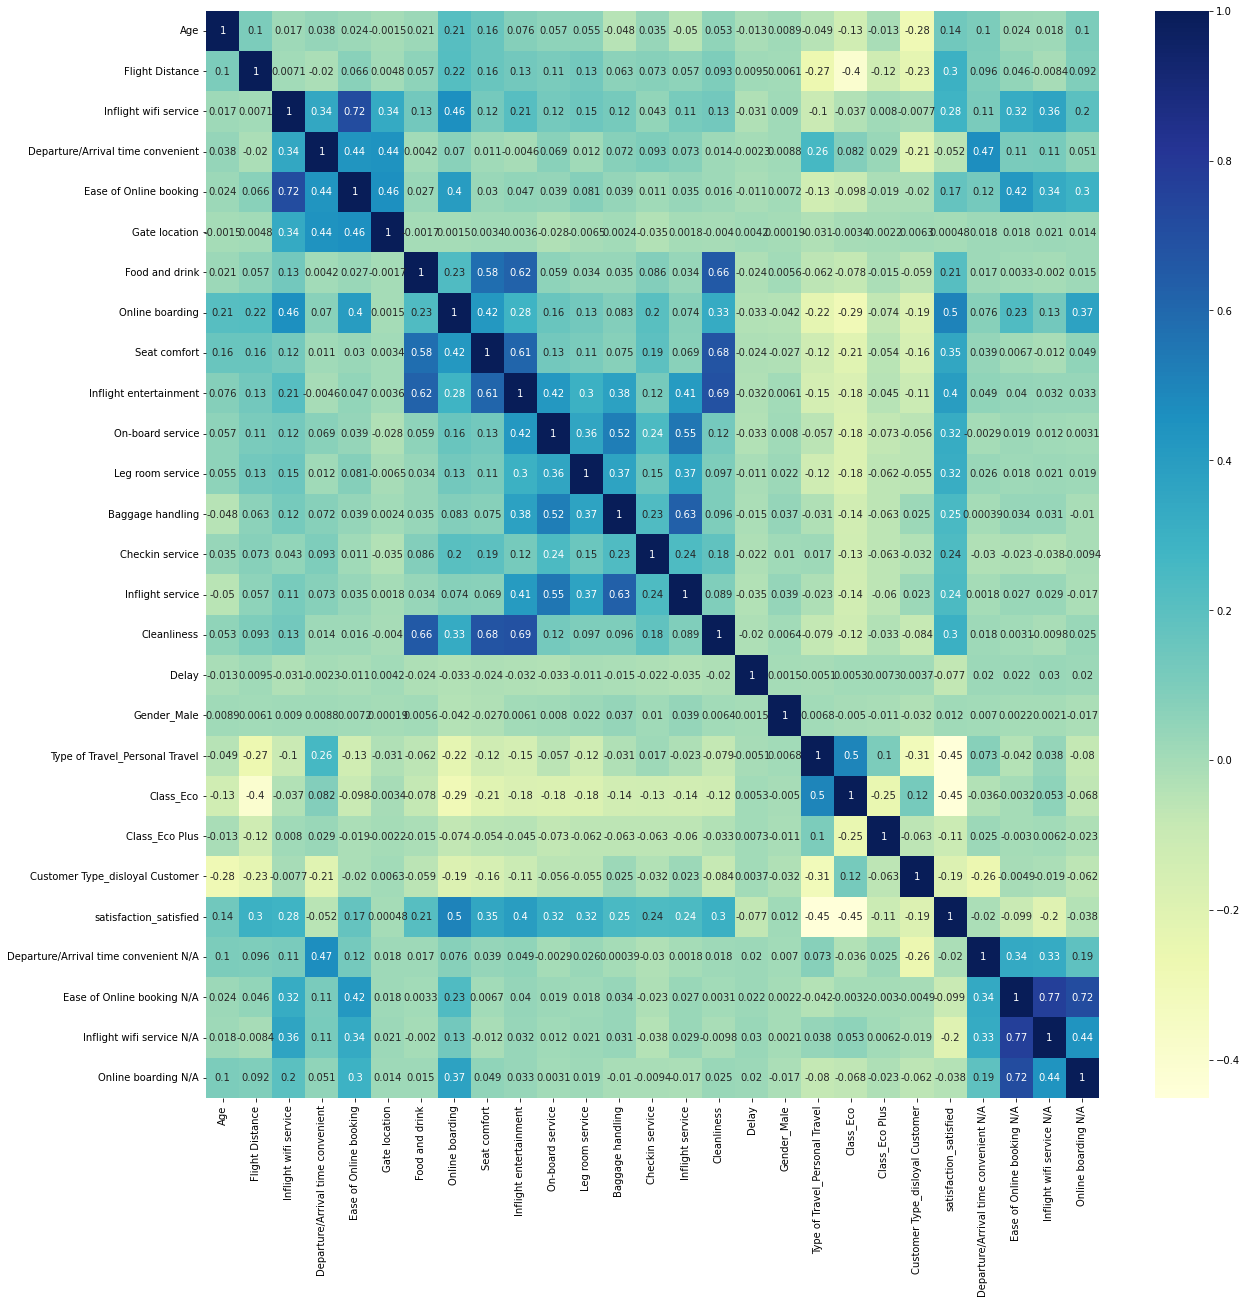

In [21]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(co, cmap="YlGnBu", annot=True) #피어슨 상관계수

In [22]:
model_cat = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9648,0.9952,0.9452,0.9728,0.9588,0.9280,0.9283
1,0.9607,0.9946,0.9416,0.9669,0.9541,0.9197,0.9199
2,0.9656,0.9954,0.9472,0.9729,0.9598,0.9298,0.9300
3,0.9621,0.9948,0.9410,0.9707,0.9557,0.9226,0.9229
4,0.9615,0.9950,0.9399,0.9704,0.9549,0.9214,0.9217
5,0.9631,0.9943,0.9424,0.9716,0.9568,0.9246,0.9249
6,0.9630,0.9948,0.9419,0.9719,0.9566,0.9243,0.9247
7,0.9613,0.9947,0.9385,0.9712,0.9546,0.9208,0.9212
8,0.9645,0.9957,0.9469,0.9706,0.9586,0.9276,0.9278
9,0.9645,0.9956,0.9422,0.9752,0.9584,0.9275,0.9279


In [23]:
from pycaret.datasets import get_data
X_test = get_config('X_test')
X_train = get_config('X_train')
Y_test = get_config('y_test')
Y_train = get_config('y_train')

test_x = get_config('X_test')
train_x = get_config('X_train')
test_y = get_config('y_test')
train_y = get_config('y_train')

x_test = get_config('X_test')
x_train = get_config('X_train')
y_test = get_config('y_test')
y_train = get_config('y_train')

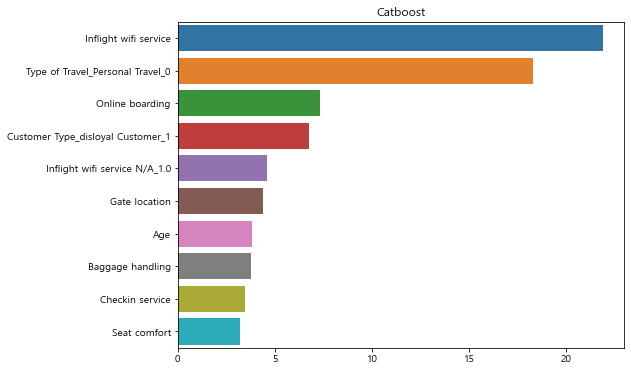

In [24]:
ft_importance_values = model_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [25]:
from sklearn.model_selection import train_test_split

# load sample
target = data['satisfaction_satisfied']

# train_test_split

train_X = data.loc[:,'Age':]
train_Y = data.loc[:,'satisfaction_satisfied']
test_X = data.loc[:,'Age':]
test_Y = data.loc[:,'satisfaction_satisfied']

train_X, test_X, train_Y, test_Y = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=123)
train_X.drop(['satisfaction_satisfied'], axis='columns', inplace=True)
test_X.drop(['satisfaction_satisfied'], axis='columns', inplace=True)

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
import time
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

results=[]
i=0
random_state=123
skf = StratifiedKFold(n_splits=10, random_state=123)
#skf = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
for train_idx, validation_idx in skf.split(train_X,train_Y):
    x_train = train_X.iloc[train_idx,:]
    y_train = train_Y.iloc[train_idx]
    x_validation = train_X.iloc[validation_idx,:]
    y_validation = train_Y.iloc[validation_idx]
    # 1. Logistic regression    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'LogisticRegression',accuracy_train,accuracy_validation,training_time])
    # 2. Decision tree
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'DecisionTree',accuracy_train,accuracy_validation,training_time])
#     # 3. Support vector machine
#     from sklearn.svm import SVC
#     model = SVC()
#     start_time = time.time()
#     model.fit(x_train, y_train)
#     training_time = time.time() - start_time
#     y_pred_train = model.predict(x_train)
#     y_pred_validation = model.predict(x_validation)
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_validation = accuracy_score(y_validation, y_pred_validation)
#     results.append([i,'SupportVectorMachine',accuracy_train,accuracy_validation,training_time])
    # 4. Gaussian naive bayes
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'GaussianNaiveBayes',accuracy_train,accuracy_validation,training_time])
    # 5. K nearest neighbor
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'KNearestNeighbor',accuracy_train,accuracy_validation,training_time]) 
    # 6. Random forest
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'RandomForest',accuracy_train,accuracy_validation,training_time])
    # 7. Gradient boosing
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'GradientBoosing',accuracy_train,accuracy_validation,training_time])
#     # 8. Neural network
#     from sklearn.neural_network import MLPClassifier
#     model = MLPClassifier()
#     start_time = time.time()
#     model.fit(x_train, y_train)
#     training_time = time.time() - start_time
#     y_pred_train = model.predict(x_train)
#     y_pred_validation = model.predict(x_validation)
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_validation = accuracy_score(y_validation, y_pred_validation)
#     results.append([i,'NeuralNetwork',accuracy_train,accuracy_validation,training_time])
#     # 9. Bagging classifier
#     from sklearn.ensemble import BaggingClassifier
#     model = BaggingClassifier()
#     start_time = time.time()
#     model.fit(x_train, y_train)
#     training_time = time.time() - start_time
#     y_pred_train = model.predict(x_train)
#     y_pred_validation = model.predict(x_validation)
#     accuracy_train = accuracy_score(y_train, y_pred_train)
#     accuracy_validation = accuracy_score(y_validation, y_pred_validation)
#     results.append([i,'BaggingClassifier',accuracy_train,accuracy_validation,training_time])
    # 10. Extra trees
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'ExtraTrees',accuracy_train,accuracy_validation,training_time])    
    # 11. Adaboost
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'AdaBoost',accuracy_train,accuracy_validation,training_time])    
    # 12. XGboost
    from xgboost import XGBClassifier
    model = XGBClassifier(eval_metric='logloss')
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'XGBoost',accuracy_train,accuracy_validation,training_time])    
    # 13. LightGBM
    from lightgbm import LGBMClassifier
    model = LGBMClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'lightGBM',accuracy_train,accuracy_validation,training_time])    
    # 14. Catboost
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    results.append([i,'CatBoostClassifier',accuracy_train,accuracy_validation,training_time])    
    i+=1

In [27]:
df_results =pd.DataFrame(data=results, 
                columns= ['iter','method','accuracy_train','accuracy_validation','training_time'])
df_results.tail(20)

,iter,method,accuracy_train,accuracy_validation,training_time
90,8,GaussianNaiveBayes,0.848246,0.841680,0.062486
91,8,KNearestNeighbor,0.939977,0.912393,1.131001
92,8,RandomForest,1.000000,0.963799,9.109446
93,8,GradientBoosing,0.940312,0.939906,13.442991
94,8,ExtraTrees,1.000000,0.961265,8.917565
95,8,AdaBoost,0.927388,0.925908,3.662950
96,8,XGBoost,0.976860,0.966453,6.318755
97,8,lightGBM,0.965919,0.965005,0.966720
98,8,CatBoostClassifier,0.977128,0.963195,33.637793
99,9,LogisticRegression,0.896257,0.895740,1.235900


In [28]:
import numpy as np
df_acc_test = df_results.pivot_table(index='method', columns='iter')["accuracy_validation"].reset_index()
df_acc_test['mean']=np.mean(df_acc_test, axis=1)
df_acc_test=df_acc_test.sort_values('mean')
df_acc_test

iter,method,0,1,2,3,4,5,6,7,8,9,mean
4,GaussianNaiveBayes,0.852437,0.844112,0.844233,0.849180,0.854730,0.852057,0.849403,0.849523,0.841680,0.846265,0.848362
7,LogisticRegression,0.893581,0.893460,0.899614,0.904078,0.896959,0.899119,0.895016,0.898395,0.897430,0.895740,0.897339
6,KNearestNeighbor,0.909870,0.909870,0.914575,0.917712,0.911197,0.912996,0.910100,0.912876,0.912393,0.916496,0.912808
0,AdaBoost,0.928451,0.925314,0.925555,0.931708,0.925072,0.932304,0.923977,0.928201,0.925908,0.924943,0.927143
5,GradientBoosing,0.939792,0.938224,0.938345,0.943653,0.936052,0.939061,0.938096,0.944491,0.939906,0.938820,0.939644
2,DecisionTree,0.943292,0.941844,0.942930,0.944739,0.935931,0.943285,0.942199,0.947387,0.939544,0.944491,0.942564
3,ExtraTrees,0.961390,0.958132,0.960304,0.959580,0.957770,0.959213,0.958972,0.961144,0.961265,0.959937,0.959771
8,RandomForest,0.962958,0.960425,0.960545,0.962235,0.958374,0.959817,0.959213,0.962351,0.963799,0.961868,0.961158
9,XGBoost,0.965251,0.962958,0.961631,0.962597,0.960063,0.960420,0.962592,0.962954,0.966453,0.961144,0.962606
10,lightGBM,0.966578,0.961269,0.961752,0.965854,0.962717,0.961265,0.961989,0.963195,0.965005,0.962230,0.963185


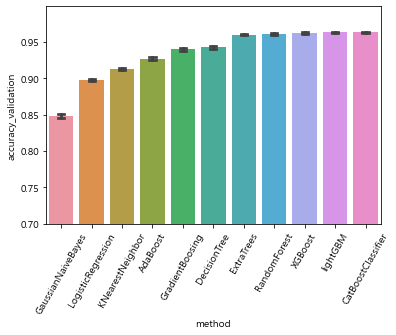

In [29]:
import seaborn as sns
#from statannot import add_stat_annotation
ax = sns.barplot(x="method", y="accuracy_validation", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('accuracy_validation').index)
ax.set(ylim=(0.70, 0.999))
ax.set_xticklabels(ax.get_xticklabels(),rotation=60);

In [31]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [36]:
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import accuracy_score


def objective(trial):
  param = {
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005, 0.02, 0.05, 0.08, 0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 2000, 8000),
        'l2_leaf_reg': trial.suggest_categorical('l2_leaf_reg', [0.01, 0.05, 0.1, 0.5, 1, 5]),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
  }



  cat = CatBoostClassifier(random_seed=123, **param)
  cat.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_validation,y_validation)],
          early_stopping_rounds=35,
          verbose=100)
  preds = cat.predict(x_validation)
  pred_labels = np.rint(preds)
  accuracy = accuracy_score(y_validation, pred_labels)
  #accuracy = sklearn.metrics.accuracy_score(y_validation, pred_labels)
    
  return accuracy



sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'maximize',
    sampler = sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)


[I 2022-08-10 11:37:45,609] A new study created in memory with name: cat_parameter_opt


0:	learn: 0.6679783	test: 0.6679783	test1: 0.6684352	best: 0.6684352 (0)	total: 1.13s	remaining: 55m 24s
100:	learn: 0.1664667	test: 0.1664667	test1: 0.1748596	best: 0.1748596 (100)	total: 56.3s	remaining: 26m 21s
200:	learn: 0.1231185	test: 0.1231185	test1: 0.1389121	best: 0.1389121 (200)	total: 2m 1s	remaining: 27m 28s
300:	learn: 0.1032486	test: 0.1032486	test1: 0.1247395	best: 0.1247395 (300)	total: 2m 57s	remaining: 25m 52s
400:	learn: 0.0904652	test: 0.0904652	test1: 0.1169518	best: 0.1169518 (400)	total: 3m 47s	remaining: 23m 59s
500:	learn: 0.0822540	test: 0.0822540	test1: 0.1126292	best: 0.1126292 (500)	total: 4m 32s	remaining: 22m 2s
600:	learn: 0.0720135	test: 0.0720135	test1: 0.1076691	best: 0.1076691 (600)	total: 5m 29s	remaining: 21m 21s
700:	learn: 0.0564187	test: 0.0564187	test1: 0.0984621	best: 0.0984621 (700)	total: 6m 48s	remaining: 21m 42s
800:	learn: 0.0470141	test: 0.0470141	test1: 0.0920623	best: 0.0920623 (800)	total: 8m 9s	remaining: 21m 45s
900:	learn: 0.04114

[I 2022-08-10 11:48:31,790] Trial 0 finished with value: 0.9636780499577652 and parameters: {'learning_rate': 0.02, 'n_estimators': 2936, 'l2_leaf_reg': 5, 'max_depth': 14, 'random_strength': 21}. Best is trial 0 with value: 0.9636780499577652.


0:	learn: 0.6440176	test: 0.6440176	test1: 0.6437253	best: 0.6437253 (0)	total: 36.5ms	remaining: 2m 16s
100:	learn: 0.1749758	test: 0.1749758	test1: 0.1743418	best: 0.1743418 (100)	total: 3.6s	remaining: 2m 9s
200:	learn: 0.1117347	test: 0.1117347	test1: 0.1145564	best: 0.1145564 (200)	total: 7.16s	remaining: 2m 6s
300:	learn: 0.0889667	test: 0.0889667	test1: 0.0954492	best: 0.0954492 (300)	total: 10.8s	remaining: 2m 3s
400:	learn: 0.0803281	test: 0.0803281	test1: 0.0903995	best: 0.0903995 (400)	total: 14.4s	remaining: 2m
500:	learn: 0.0742856	test: 0.0742856	test1: 0.0876904	best: 0.0876904 (500)	total: 18.1s	remaining: 1m 57s
600:	learn: 0.0696911	test: 0.0696911	test1: 0.0865801	best: 0.0865691 (596)	total: 21.8s	remaining: 1m 54s


[I 2022-08-10 11:48:55,102] Trial 1 finished with value: 0.9636780499577652 and parameters: {'learning_rate': 0.08, 'n_estimators': 3747, 'l2_leaf_reg': 5, 'max_depth': 6, 'random_strength': 51}. Best is trial 0 with value: 0.9636780499577652.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.08656905167
bestIteration = 596

Shrink model to first 597 iterations.
0:	learn: 0.6623491	test: 0.6623491	test1: 0.6621697	best: 0.6621697 (0)	total: 35.2ms	remaining: 4m 30s
100:	learn: 0.2013495	test: 0.2013495	test1: 0.2002334	best: 0.2002334 (100)	total: 3.16s	remaining: 3m 57s
200:	learn: 0.1655316	test: 0.1655316	test1: 0.1651416	best: 0.1651416 (200)	total: 6.01s	remaining: 3m 43s
300:	learn: 0.1295885	test: 0.1295885	test1: 0.1307104	best: 0.1307104 (300)	total: 8.88s	remaining: 3m 38s
400:	learn: 0.1062006	test: 0.1062006	test1: 0.1092814	best: 0.1092814 (400)	total: 11.8s	remaining: 3m 34s
500:	learn: 0.0950779	test: 0.0950779	test1: 0.0999267	best: 0.0999267 (500)	total: 14.8s	remaining: 3m 31s
600:	learn: 0.0890021	test: 0.0890021	test1: 0.0955865	best: 0.0955865 (600)	total: 17.6s	remaining: 3m 28s
700:	learn: 0.0852060	test: 0.0852060	test1: 0.0934765	best: 0.0934765 (700)	total: 20.6s	remaining: 3m 25s


[I 2022-08-10 11:49:39,613] Trial 2 finished with value: 0.9636780499577652 and parameters: {'learning_rate': 0.05, 'n_estimators': 7694, 'l2_leaf_reg': 0.01, 'max_depth': 5, 'random_strength': 50}. Best is trial 0 with value: 0.9636780499577652.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.08738038469
bestIteration = 1475

Shrink model to first 1476 iterations.
0:	learn: 0.6847912	test: 0.6847912	test1: 0.6847341	best: 0.6847341 (0)	total: 52.3ms	remaining: 4m 27s
100:	learn: 0.2255460	test: 0.2255460	test1: 0.2310513	best: 0.2310513 (100)	total: 10s	remaining: 8m 18s
200:	learn: 0.1670924	test: 0.1670924	test1: 0.1762527	best: 0.1762527 (200)	total: 20.1s	remaining: 8m 12s
300:	learn: 0.1423629	test: 0.1423629	test1: 0.1560695	best: 0.1560695 (300)	total: 29.9s	remaining: 7m 58s
400:	learn: 0.1263615	test: 0.1263615	test1: 0.1434298	best: 0.1434298 (400)	total: 39.7s	remaining: 7m 47s
500:	learn: 0.1151935	test: 0.1151935	test1: 0.1354474	best: 0.1354474 (500)	total: 49.6s	remaining: 7m 36s
600:	learn: 0.1019466	test: 0.1019466	test1: 0.1258501	best: 0.1258501 (600)	total: 60s	remaining: 7m 30s
700:	learn: 0.0870030	test: 0.0870030	test1: 0.1151067	best: 0.1151067 (700)	total: 1m 10s	remaining: 7m 26s
8

[I 2022-08-10 11:51:33,063] Trial 3 finished with value: 0.9612646313503077 and parameters: {'learning_rate': 0.02, 'n_estimators': 5120, 'l2_leaf_reg': 0.1, 'max_depth': 11, 'random_strength': 93}. Best is trial 0 with value: 0.9636780499577652.


0:	learn: 0.6681021	test: 0.6681021	test1: 0.6677695	best: 0.6677695 (0)	total: 25.3ms	remaining: 1m 31s
100:	learn: 0.2079067	test: 0.2079067	test1: 0.2057184	best: 0.2057184 (100)	total: 2.78s	remaining: 1m 37s
200:	learn: 0.1225411	test: 0.1225411	test1: 0.1232936	best: 0.1232936 (200)	total: 5.52s	remaining: 1m 34s
300:	learn: 0.1018116	test: 0.1018116	test1: 0.1046472	best: 0.1046472 (300)	total: 8.21s	remaining: 1m 30s
400:	learn: 0.0934592	test: 0.0934592	test1: 0.0983363	best: 0.0982154 (397)	total: 10.8s	remaining: 1m 27s
500:	learn: 0.0885548	test: 0.0885548	test1: 0.0951592	best: 0.0951592 (500)	total: 13.4s	remaining: 1m 23s
600:	learn: 0.0842349	test: 0.0842349	test1: 0.0923676	best: 0.0923676 (600)	total: 15.9s	remaining: 1m 20s
700:	learn: 0.0814988	test: 0.0814988	test1: 0.0913348	best: 0.0913015 (686)	total: 18.5s	remaining: 1m 17s
800:	learn: 0.0789978	test: 0.0789978	test1: 0.0903938	best: 0.0903938 (800)	total: 21s	remaining: 1m 14s


[I 2022-08-10 11:51:57,096] Trial 4 finished with value: 0.9616266441414263 and parameters: {'learning_rate': 0.1, 'n_estimators': 3628, 'l2_leaf_reg': 0.01, 'max_depth': 4, 'random_strength': 99}. Best is trial 0 with value: 0.9636780499577652.


900:	learn: 0.0766510	test: 0.0766510	test1: 0.0899371	best: 0.0898805 (866)	total: 23.7s	remaining: 1m 11s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.08988054672
bestIteration = 866

Shrink model to first 867 iterations.
0:	learn: 0.6134532	test: 0.6134532	test1: 0.6144651	best: 0.6144651 (0)	total: 47.4ms	remaining: 5m 2s
100:	learn: 0.1077279	test: 0.1077279	test1: 0.1156770	best: 0.1156770 (100)	total: 5.03s	remaining: 5m 12s
200:	learn: 0.0777753	test: 0.0777753	test1: 0.0944507	best: 0.0944507 (200)	total: 9.86s	remaining: 5m 2s
300:	learn: 0.0632514	test: 0.0632514	test1: 0.0884060	best: 0.0883893 (299)	total: 14.8s	remaining: 4m 57s


[I 2022-08-10 11:52:16,395] Trial 5 finished with value: 0.9631953662362737 and parameters: {'learning_rate': 0.08, 'n_estimators': 6374, 'l2_leaf_reg': 1, 'max_depth': 8, 'random_strength': 6}. Best is trial 0 with value: 0.9636780499577652.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.08756663631
bestIteration = 351

Shrink model to first 352 iterations.
0:	learn: 0.6060650	test: 0.6060650	test1: 0.6072715	best: 0.6072715 (0)	total: 103ms	remaining: 8m 18s
100:	learn: 0.1206815	test: 0.1206815	test1: 0.1369403	best: 0.1369403 (100)	total: 8.14s	remaining: 6m 21s
200:	learn: 0.0569926	test: 0.0569926	test1: 0.0911399	best: 0.0911399 (200)	total: 17.7s	remaining: 6m 48s
300:	learn: 0.0352786	test: 0.0352786	test1: 0.0911496	best: 0.0905435 (266)	total: 27.9s	remaining: 7m
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.09054350548
bestIteration = 266

Shrink model to first 267 iterations.


[I 2022-08-10 11:52:44,694] Trial 6 finished with value: 0.9612646313503077 and parameters: {'learning_rate': 0.1, 'n_estimators': 4833, 'l2_leaf_reg': 1, 'max_depth': 10, 'random_strength': 43}. Best is trial 0 with value: 0.9636780499577652.


0:	learn: 0.6280225	test: 0.6280225	test1: 0.6283393	best: 0.6283393 (0)	total: 54.3ms	remaining: 4m 34s
100:	learn: 0.1302094	test: 0.1302094	test1: 0.1328000	best: 0.1328000 (100)	total: 4.05s	remaining: 3m 18s
200:	learn: 0.0889525	test: 0.0889525	test1: 0.0972343	best: 0.0972343 (200)	total: 7.9s	remaining: 3m 10s
300:	learn: 0.0725745	test: 0.0725745	test1: 0.0895672	best: 0.0895226 (299)	total: 11.9s	remaining: 3m 8s
400:	learn: 0.0632534	test: 0.0632534	test1: 0.0881871	best: 0.0880651 (397)	total: 15.9s	remaining: 3m 4s


[I 2022-08-10 11:53:02,675] Trial 7 finished with value: 0.9628333534451551 and parameters: {'learning_rate': 0.08, 'n_estimators': 5051, 'l2_leaf_reg': 0.01, 'max_depth': 7, 'random_strength': 16}. Best is trial 0 with value: 0.9636780499577652.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.08796925095
bestIteration = 409

Shrink model to first 410 iterations.
0:	learn: 0.6899027	test: 0.6899027	test1: 0.6898846	best: 0.6898846 (0)	total: 48.6ms	remaining: 2m 31s
100:	learn: 0.4658416	test: 0.4658416	test1: 0.4654900	best: 0.4654900 (100)	total: 3.65s	remaining: 1m 49s
200:	learn: 0.3566651	test: 0.3566651	test1: 0.3560167	best: 0.3560167 (200)	total: 7.03s	remaining: 1m 42s
300:	learn: 0.2996481	test: 0.2996481	test1: 0.2992094	best: 0.2992094 (300)	total: 10.5s	remaining: 1m 38s
400:	learn: 0.2661107	test: 0.2661107	test1: 0.2656617	best: 0.2656617 (400)	total: 13.8s	remaining: 1m 33s
500:	learn: 0.2422573	test: 0.2422573	test1: 0.2418592	best: 0.2418592 (500)	total: 17.2s	remaining: 1m 29s
600:	learn: 0.2266140	test: 0.2266140	test1: 0.2261057	best: 0.2261057 (600)	total: 20.7s	remaining: 1m 26s
700:	learn: 0.2131553	test: 0.2131553	test1: 0.2128315	best: 0.2128315 (700)	total: 24.2s	remaining: 1m 23s


[I 2022-08-10 11:54:51,849] Trial 8 finished with value: 0.9537830336671895 and parameters: {'learning_rate': 0.005, 'n_estimators': 3119, 'l2_leaf_reg': 0.5, 'max_depth': 6, 'random_strength': 43}. Best is trial 0 with value: 0.9636780499577652.


3118:	learn: 0.1120629	test: 0.1120629	test1: 0.1154335	best: 0.1154335 (3118)	total: 1m 48s	remaining: 0us

bestTest = 0.1154335278
bestIteration = 3118

0:	learn: 0.6846874	test: 0.6846874	test1: 0.6846645	best: 0.6846645 (0)	total: 73.3ms	remaining: 4m 4s
100:	learn: 0.2626596	test: 0.2626596	test1: 0.2634832	best: 0.2634832 (100)	total: 4.79s	remaining: 2m 33s
200:	learn: 0.2005847	test: 0.2005847	test1: 0.2026851	best: 0.2026851 (200)	total: 9.25s	remaining: 2m 24s
300:	learn: 0.1744457	test: 0.1744457	test1: 0.1774782	best: 0.1774782 (300)	total: 13.5s	remaining: 2m 15s
400:	learn: 0.1572193	test: 0.1572193	test1: 0.1617441	best: 0.1617441 (400)	total: 17.9s	remaining: 2m 10s
500:	learn: 0.1454221	test: 0.1454221	test1: 0.1510133	best: 0.1510133 (500)	total: 22.2s	remaining: 2m 5s
600:	learn: 0.1354983	test: 0.1354983	test1: 0.1424478	best: 0.1424478 (600)	total: 26.5s	remaining: 2m
700:	learn: 0.1169767	test: 0.1169767	test1: 0.1258569	best: 0.1258569 (700)	total: 31.1s	remainin

[I 2022-08-10 11:56:04,522] Trial 9 finished with value: 0.9621093278629178 and parameters: {'learning_rate': 0.02, 'n_estimators': 3332, 'l2_leaf_reg': 0.1, 'max_depth': 8, 'random_strength': 98}. Best is trial 0 with value: 0.9636780499577652.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.08864575106
bestIteration = 1501

Shrink model to first 1502 iterations.
Best Score: 0.9636780499577652
Best trial {'learning_rate': 0.02, 'n_estimators': 2936, 'l2_leaf_reg': 5, 'max_depth': 14, 'random_strength': 21}


In [37]:
# 15. Catboost_tuned
tuned_cat = CatBoostClassifier(**study.best_params, verbose=False)
start_time = time.time()
tuned_cat.fit(x_train, y_train)
training_time = time.time() - start_time
y_pred_train = tuned_cat.predict(x_train)
y_pred_validation = tuned_cat.predict(x_validation)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_validation = accuracy_score(y_validation, y_pred_validation)

In [38]:
accuracy_validation

0.9645227464703753

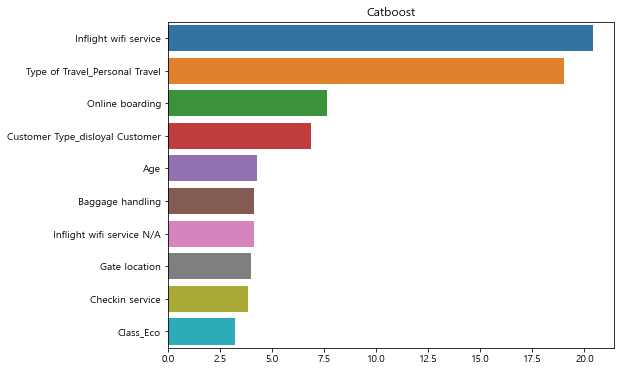

In [51]:
model_cat = CatBoostClassifier(verbose=False)
start_time = time.time()
model_cat.fit(x_train, y_train)


ft_importance_values = model_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

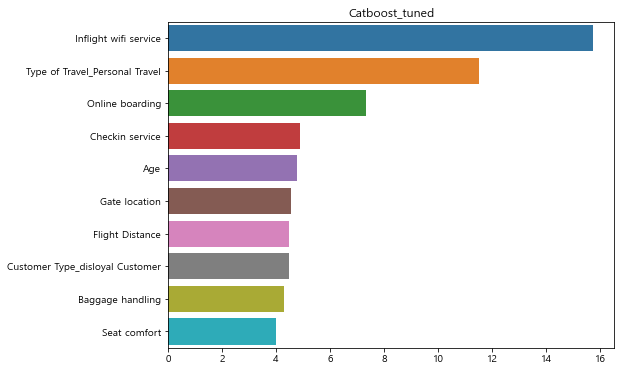

In [40]:
ft_importance_values = tuned_cat.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Catboost_tuned')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'